# 1. Algorithms Review: Comparison of SIFT, SURF and KAZE

In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import PIL
from PIL import ImageFilter
import numpy as np
import time

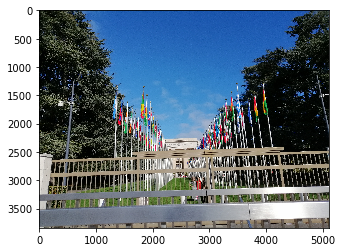

In [2]:
imageDir = "../Images/"

# Read the test picture
unImage = cv2.imread(imageDir + "UN.jpg")
plt.imshow(cv2.cvtColor(unImage, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
type(unImage)

numpy.ndarray

### First Transformation: Different point of view

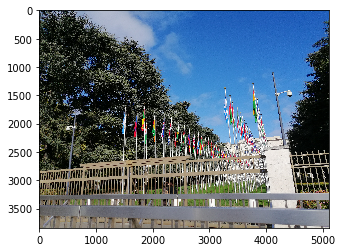

In [4]:
unPov = cv2.imread(imageDir + "UN_pov.jpg")
plt.imshow(cv2.cvtColor(unPov, cv2.COLOR_BGR2RGB))
plt.show()

### Second Transformation: Zoom x2

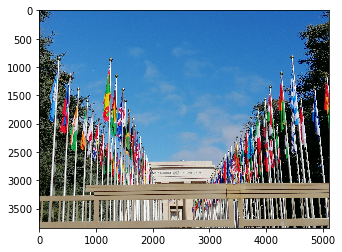

In [4]:
unZoom = cv2.imread(imageDir + "UN_zoom2.jpg")
plt.imshow(cv2.cvtColor(unZoom, cv2.COLOR_BGR2RGB))
plt.show()

### Third Transformation: Blurred image

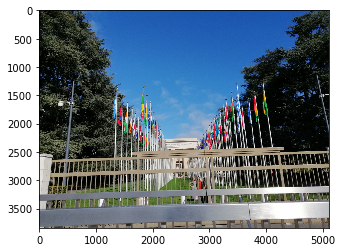

In [14]:
unImagePIL = PIL.Image.open(imageDir + "UN.jpg")
unBlur = np.array(unImagePIL.filter(ImageFilter.BLUR))
plt.imshow(unBlur)
plt.show()

#### KAZE Implementation

In [5]:
def kaze_descriptor(image):
    try:
        kaze = cv2.KAZE_create()
        kps = kaze.detect(image)
        
        kps, dscs = kaze.compute(image, kps)
            
    except cv2.error as e:
        print('Error: ', e)
        return None
    
    return kps, dscs

#### SIFT Implementation

In [6]:
def sift_descriptor(image):
    try:
        imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sift = cv2.xfeatures2d.SIFT_create()
        (kps, dscs) = sift.detectAndCompute(imageGray, None)
        
    except cv2.error as e:
        print('Error: ', e)
        return None
    
    return kps, dscs

#### SURF Implementation

In [7]:
def surf_descriptor(image):
    try:
        imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        surf = cv2.xfeatures2d.SURF_create()
        (kps, dscs) = surf.detectAndCompute(imageGray, None)
        
    except cv2.error as e:
        print('Error: ', e)
        return None
    
    return kps, dscs

#### Repeatability Computation

In [8]:
def repeatability_computation(image1, kps1, desc1, image2, kps2, desc2):
    
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(desc1,desc2, k=2)
    
    good = []
    for m, n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
            
    print("Repeatability: ", len(good) / np.min([len(desc1), len(desc2)]))

#### Keypoint Drawing

In [9]:
def draw_keypoints(image, kps):
    
    kazeImage = image.copy()
    for keypoint in kps:
        x_key = int(keypoint.pt[0])
        y_key = int(keypoint.pt[1])
        magnitude_key = int(keypoint.size)
        orientation_key = keypoint.angle * math.pi / 180

        cv2.circle(kazeImage, (x_key, y_key), magnitude_key, (0, 200, 0), 2)

        x_end = int(x_key + magnitude_key * math.cos(orientation_key))
        y_end = int(y_key + magnitude_key * math.sin(orientation_key))

        cv2.line(kazeImage, (x_key, y_key), (x_end, y_end), (0, 0, 200), 2)

    return kazeImage

#### KAZE Test

In [10]:
unImage.shape

(3840, 5120, 3)

In [7]:
kazeTime= time.time()

# Untransformed image
unKazeKps, unKazeDscs = kaze_descriptor(unImage)
unKaze = draw_keypoints(unImage, unKazeKps[-60:])

# Point of view
unKazeKpsPov, unKazeDscsPov = kaze_descriptor(unPov)
unKaze = draw_keypoints(unPov, unKazeKpsPov[-30:])

# Zoom
unKazeKpsZoom, unKazeDscsZoom = kaze_descriptor(unZoom)
unKaze = draw_keypoints(unZoom, unKazeKpsZoom[-30:])

# Blurry image
#unKazeKpsBlur, unKazeDscsBlur = kaze_descriptor(unBlur)
#unKaze = draw_keypoints(unBlur, unKazeKpsBlur[-30:])

print("-- KAZE:")
print("Point of view -")
repeatability_computation(image1=unImage, kps1=unKazeKps, desc1=unKazeDscs,
                           image2=unPov, kps2=unKazeKpsPov, desc2=unKazeDscsPov)

print("Zoom -")
repeatability_computation(image1=unImage, kps1=unKazeKps, desc1=unKazeDscs,
                           image2=unZoom, kps2=unKazeKpsZoom, desc2=unKazeDscsZoom)

print("Blurry Image -")
#repeatability_computation(image1=unImage, kps1=unKazeKps, desc1=unKazeDscs,
 #                          image2=unBlur, kps2=unKazeKpsBlur, desc2=unKazeDscsBlur)
print("Total KAZE time: ", time.time() - kazeTime)

okay


NameError: name 'draw_keypoints' is not defined

#### SIFT Test

In [20]:
siftTime = time.time()
# Untransformed Image
unSiftKps, unSiftDscs = sift_descriptor(unImage)
unSift = draw_keypoints(unImage, unSiftKps[-60:])

# Point of view
unSiftKpsPov, unSiftDscsPov = sift_descriptor(unPov)
unSift = draw_keypoints(unPov, unSiftKpsPov[-30:])

# Zoom
unSiftKpsZoom, unSiftDscsZoom = sift_descriptor(unZoom)
unKaze = draw_keypoints(unZoom, unSiftKpsZoom[-30:])

# Blurry image
#unSiftKpsBlur, unSiftDscsBlur = sift_descriptor(unBlur)
#unSift = draw_keypoints(unBlur, unSiftKpsBlur[-30:])

print("-- SIFT:")
print("Point of view -")
repeatability_computation(image1=unImage, kps1=unSiftKps, desc1=unSiftDscs,
                           image2=unPov, kps2=unSiftKpsPov, desc2=unSiftDscsPov)

print("Zoom -")
repeatability_computation(image1=unImage, kps1=unSiftKps, desc1=unSiftDscs,
                           image2=unZoom, kps2=unSiftKpsZoom, desc2=unSiftDscsZoom)

print("Blurry Image -")
#repeatability_computation(image1=unImage, kps1=unSiftKps, desc1=unSiftDscs,
 #                          image2=unBlur, kps2=unSiftKpsBlur, desc2=unSiftDscsBlur)
print("Total SIFT time: ", time.time() - siftTime)

-- SIFT:
Point of view -
Repeatability:  0.007978134003102608
Zoom -
Repeatability:  0.03621939495769207
Blurry Image -
Total SIFT time:  2472.4167227745056


#### SURF Test

In [15]:
surfTime = time.time()

# SURF Keypoints Drawing
unSurfKps, unSurfDscs = surf_descriptor(unImage)
unSurf = draw_keypoints(unImage, unSurfKps[-60:])

# Point of view
unSurfKpsPov, unSurfDscsPov = surf_descriptor(unPov)
unSurf = draw_keypoints(unPov, unSurfKpsPov[-30:])

# Zoom
unSurfKpsZoom, unSurfDscsZoom = surf_descriptor(unZoom)
unSurf = draw_keypoints(unZoom, unSurfKpsZoom[-30:])

# Blurry image
#unSurfKpsBlur, unSurfDscsBlur = surf_descriptor(unBlur)
#unSurf = draw_keypoints(unBlur, unSurfKpsBlur[-30:])

print("-- SURF:")
print("Point of view -")
repeatability_computation(image1=unImage, kps1=unSurfKps, desc1=unSurfDscs,
                           image2=unBlur, kps2=unSurfKpsBlur, desc2=unSurfDscsBlur)

print("Zoom -")
repeatability_computation(image1=unImage, kps1=unSurfKps, desc1=unSurfDscs,
                           image2=unZoom, kps2=unSurfKpsZoom, desc2=unSurfDscsZoom)

print("Blurry Image -")
#repeatability_computation(image1=unImage, kps1=unSurfKps, desc1=unSurfDscs,
#                           image2=unBlur, kps2=unSurfKpsBlur, desc2=unSurfDscsBlur)

print("Total SURF time: ", time.time() - surfTime)

-- SURF:
Point of view -
Repeatability:  0.2022028973120807
Zoom -
Repeatability:  0.059765675710762044
Blurry Image -
Total SURF time:  839.0555090904236


#### Result Plot

In [ ]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(lenaImage, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(lenaKaze, cv2.COLOR_BGR2RGB))
plt.title('KAZE Implementation')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(lenaSift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Implementation')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(lenaSurf, cv2.COLOR_BGR2RGB))
plt.title('SURF Implementation')

In [10]:
unImage.shape

(3840, 5120, 3)